In [76]:
import yfinance as yf
import ta
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib as plt
from matplotlib.pyplot import figure
import plotly.graph_objects as go
from plotly.subplots import make_subplots
figure(figsize=(6,4))
xaxis=dict(type = "category")
%matplotlib inline

In [89]:
df = pd.read_csv("C38U_10.csv", index_col = "time", parse_dates = ["time"])
df = df[df.columns[:6]]
df['time'] = pd.date_range("2020-12-07", periods=len(df), freq="10min")
df.tail(10)

open  high   low  close   Basis     Upper  \
time                                                                   
2022-09-30 15:30:00+08:00  1.90  1.91  1.89   1.90  1.8880  1.918887   
2022-09-30 15:40:00+08:00  1.91  1.91  1.90   1.90  1.8880  1.918887   
2022-09-30 15:50:00+08:00  1.91  1.91  1.90   1.91  1.8890  1.923073   
2022-09-30 16:00:00+08:00  1.91  1.92  1.90   1.92  1.8910  1.930000   
2022-09-30 16:10:00+08:00  1.92  1.92  1.91   1.92  1.8925  1.935845   
2022-09-30 16:20:00+08:00  1.92  1.93  1.91   1.91  1.8940  1.937886   
2022-09-30 16:30:00+08:00  1.91  1.93  1.91   1.93  1.8960  1.945659   
2022-09-30 16:40:00+08:00  1.93  1.93  1.92   1.92  1.8975  1.949353   
2022-09-30 16:50:00+08:00  1.92  1.94  1.92   1.94  1.9005  1.957795   
2022-09-30 17:00:00+08:00  1.92  1.92  1.92   1.92  1.9025  1.959322   

                                         time  
time                                           
2022-09-30 15:30:00+08:00 2021-04-25 05:20:00  
2022-09-30 15:40:00+08:00 2021-04-25 05:30:00  
2022-09-30 15:50:00+08:00 2021-04-25 05:40:00  
2022-09-30 16:00:00+08:00 2021-04-25 05:50:00  
2022-09-30 16:10:00+08:00 2021-04-25 06:00:00  
2022-09-30 16:20:00+08:00 2021-04-25 06:10:00  
2022-09-30 16:30:00+08:00 2021-04-25 06:20:00  
2022-09-30 16:40:00+08:00 2021-04-25 06:30:00  
2022-09-30 16:50:00+08:00 2021-04-25 06:40:00  
2022-09-30 17:00:00+08:00 2021-04-25 06:50:00

In [78]:
# remove some data
np.random.seed(0)
remove_n = 4
drop_indices = np.random.choice(df.index, remove_n, replace=False)
df = df.drop(drop_indices)

In [79]:
# plotly candlestick figure
fig = go.Figure(data=[go.Candlestick(
    x=df['time'],
    open=df['open'], high=df['high'],
    low=df['low'], close=df['close'],
)])

# grab first and last observations from df.date and make a continuous date range from that
dt_all = pd.date_range(start=df['time'].iloc[0],end=df['time'].iloc[-1], freq = '10min')

# check which dates from your source that also accur in the continuous date range
dt_obs = [d.strftime("%Y-%m-%d %H:%M:%S") for d in df['time']]

# isolate missing timestamps
dt_breaks = [d for d in dt_all.strftime("%Y-%m-%d %H:%M:%S").tolist() if not d in dt_obs]
dt_breaks = pd.to_datetime(dt_breaks)

fig.show()
fig.update_xaxes(rangebreaks=[dict(dvalue = 10*60*1000, values=dt_breaks)] )
print(fig.layout.xaxis.rangebreaks)
fig.show()

(layout.xaxis.Rangebreak({
    'dvalue': 600000,
    'values': [2021-01-17 07:50:00, 2021-02-13 13:00:00, 2021-02-14 22:10:00,
               2021-03-16 16:30:00]
}),)


In [128]:
def applyindicators(df):
    df['SMA_200'] = df.close.rolling(200).mean()
    df['SMA_20'] = df.close.rolling(20).mean()
    df['stddev'] = df.close.rolling(20).std()
    df['Upper'] = df.SMA_20 + 2 * df.stddev
    df['Lower'] = df.SMA_20 - 2 * df.stddev
    df['rsi'] = ta.momentum.rsi(df.close, 2)

In [129]:
applyindicators(df)
df.tail()

open  high   low  close   Basis     Upper  \
time                                                                   
2022-09-30 16:20:00+08:00  1.92  1.93  1.91   1.91  1.8940  1.924018   
2022-09-30 16:30:00+08:00  1.91  1.93  1.91   1.93  1.8960  1.929966   
2022-09-30 16:40:00+08:00  1.93  1.93  1.92   1.92  1.8975  1.932967   
2022-09-30 16:50:00+08:00  1.92  1.94  1.92   1.94  1.9005  1.939689   
2022-09-30 17:00:00+08:00  1.92  1.92  1.92   1.92  1.9025  1.941365   

                                         time  SMA_200  SMA_20    stddev  \
time                                                                       
2022-09-30 16:20:00+08:00 2021-04-25 06:10:00  1.93050  1.8940  0.015009   
2022-09-30 16:30:00+08:00 2021-04-25 06:20:00  1.93015  1.8960  0.016983   
2022-09-30 16:40:00+08:00 2021-04-25 06:30:00  1.92970  1.8975  0.017733   
2022-09-30 16:50:00+08:00 2021-04-25 06:40:00  1.92940  1.9005  0.019595   
2022-09-30 17:00:00+08:00 2021-04-25 06:50:00  1.92900  1.9025  0.019433   

                              Lower        rsi  Buy  Sell  Buyprice  Sellprice  
time                                                                            
2022-09-30 16:20:00+08:00  1.863982  27.862436    0     0    1.8527       1.91  
2022-09-30 16:30:00+08:00  1.862034  80.992553    0     1    1.8721       1.93  
2022-09-30 16:40:00+08:00  1.862033  46.640965    0     0    1.8624       1.92  
2022-09-30 16:50:00+08:00  1.861311  80.211968    0     1    1.8818       1.92  
2022-09-30 17:00:00+08:00  1.863635  35.518641    0     0    1.8624        NaN

In [130]:
def conditions(df):
    df['Buy'] = np.where((df.close < df.Lower) #& 
                      #  (0.97 * df.close >= df.low.shift(-1)), 1, 0)
    
    df['Sell'] = np.where((df.rsi > 50),1,0)
    
    df['Buyprice'] = 0.97 * df.close
    df['Sellprice'] = df.open.shift(-1)

SyntaxError: invalid syntax (<ipython-input-130-20e4e311d0b5>, line 5)

In [131]:
conditions(df)
df

open  high   low  close   Basis     Upper  \
time                                                                   
2020-12-07 09:00:00+08:00  1.99  2.00  1.98   1.99     NaN       NaN   
2020-12-07 09:10:00+08:00  1.99  1.99  1.98   1.99     NaN       NaN   
2020-12-07 09:20:00+08:00  1.99  2.00  1.98   1.99     NaN       NaN   
2020-12-07 09:30:00+08:00  1.99  2.01  1.99   2.01     NaN       NaN   
2020-12-07 09:40:00+08:00  2.00  2.01  1.99   2.00     NaN       NaN   
...                         ...   ...   ...    ...     ...       ...   
2022-09-30 16:20:00+08:00  1.92  1.93  1.91   1.91  1.8940  1.924018   
2022-09-30 16:30:00+08:00  1.91  1.93  1.91   1.93  1.8960  1.929966   
2022-09-30 16:40:00+08:00  1.93  1.93  1.92   1.92  1.8975  1.932967   
2022-09-30 16:50:00+08:00  1.92  1.94  1.92   1.94  1.9005  1.939689   
2022-09-30 17:00:00+08:00  1.92  1.92  1.92   1.92  1.9025  1.941365   

                                         time  SMA_200  SMA_20    stddev  \
time                                                                       
2020-12-07 09:00:00+08:00 2020-12-07 00:00:00      NaN     NaN       NaN   
2020-12-07 09:10:00+08:00 2020-12-07 00:10:00      NaN     NaN       NaN   
2020-12-07 09:20:00+08:00 2020-12-07 00:20:00      NaN     NaN       NaN   
2020-12-07 09:30:00+08:00 2020-12-07 00:30:00      NaN     NaN       NaN   
2020-12-07 09:40:00+08:00 2020-12-07 00:40:00      NaN     NaN       NaN   
...                                       ...      ...     ...       ...   
2022-09-30 16:20:00+08:00 2021-04-25 06:10:00  1.93050  1.8940  0.015009   
2022-09-30 16:30:00+08:00 2021-04-25 06:20:00  1.93015  1.8960  0.016983   
2022-09-30 16:40:00+08:00 2021-04-25 06:30:00  1.92970  1.8975  0.017733   
2022-09-30 16:50:00+08:00 2021-04-25 06:40:00  1.92940  1.9005  0.019595   
2022-09-30 17:00:00+08:00 2021-04-25 06:50:00  1.92900  1.9025  0.019433   

                              Lower         rsi  Buy  Sell  Buyprice  \
time                                                                   
2020-12-07 09:00:00+08:00       NaN         NaN    0     0    1.9303   
2020-12-07 09:10:00+08:00       NaN  100.000000    0     1    1.9303   
2020-12-07 09:20:00+08:00       NaN  100.000000    0     1    1.9303   
2020-12-07 09:30:00+08:00       NaN  100.000000    0     1    1.9497   
2020-12-07 09:40:00+08:00       NaN   50.000000    0     1    1.9400   
...                             ...         ...  ...   ...       ...   
2022-09-30 16:20:00+08:00  1.863982   27.862436    0     0    1.8527   
2022-09-30 16:30:00+08:00  1.862034   80.992553    0     1    1.8721   
2022-09-30 16:40:00+08:00  1.862033   46.640965    0     0    1.8624   
2022-09-30 16:50:00+08:00  1.861311   80.211968    0     1    1.8818   
2022-09-30 17:00:00+08:00  1.863635   35.518641    0     0    1.8624   

                           Sellprice  
time                                  
2020-12-07 09:00:00+08:00       1.99  
2020-12-07 09:10:00+08:00       1.99  
2020-12-07 09:20:00+08:00       1.99  
2020-12-07 09:30:00+08:00       2.00  
2020-12-07 09:40:00+08:00       2.00  
...                              ...  
2022-09-30 16:20:00+08:00       1.91  
2022-09-30 16:30:00+08:00       1.93  
2022-09-30 16:40:00+08:00       1.92  
2022-09-30 16:50:00+08:00       1.92  
2022-09-30 17:00:00+08:00        NaN  

[20058 rows x 16 columns]

In [132]:
buy_sell = df[(df.Buy ==1) | (df.Sell ==1)]
matched = buy_sell[(buy_sell.Buy.diff() ==1) | (buy_sell.Sell.diff() ==1)]
matched

open  high   low  close   Basis     Upper  \
time                                                                   
2021-02-25 17:00:00+08:00  2.12  2.12  2.12   2.12  2.1410  2.155364   
2021-02-26 10:00:00+08:00  2.08  2.08  2.07   2.08  2.1155  2.185229   

                                         time  SMA_200  SMA_20    stddev  \
time                                                                       
2021-02-25 17:00:00+08:00 2020-12-23 17:20:00  2.08915  2.1410  0.007182   
2021-02-26 10:00:00+08:00 2020-12-23 18:30:00  2.08885  2.1155  0.034864   

                              Lower        rsi  Buy  Sell  Buyprice  Sellprice  
time                                                                            
2021-02-25 17:00:00+08:00  2.126636   1.584207    1     0    2.0564       2.06  
2021-02-26 10:00:00+08:00  2.045771  89.436873    0     1    2.0176       2.08

In [133]:
def matchtrades(df):
    buy_sell = df[(df.Buy ==1) | (df.Sell ==1)]
    matched = buy_sell[(buy_sell.Buy.diff() ==1) | (buy_sell.Sell.diff() ==1)]
    return matched

In [134]:
matchtrades(df)

open  high   low  close   Basis     Upper  \
time                                                                   
2021-02-25 17:00:00+08:00  2.12  2.12  2.12   2.12  2.1410  2.155364   
2021-02-26 10:00:00+08:00  2.08  2.08  2.07   2.08  2.1155  2.185229   

                                         time  SMA_200  SMA_20    stddev  \
time                                                                       
2021-02-25 17:00:00+08:00 2020-12-23 17:20:00  2.08915  2.1410  0.007182   
2021-02-26 10:00:00+08:00 2020-12-23 18:30:00  2.08885  2.1155  0.034864   

                              Lower        rsi  Buy  Sell  Buyprice  Sellprice  
time                                                                            
2021-02-25 17:00:00+08:00  2.126636   1.584207    1     0    2.0564       2.06  
2021-02-26 10:00:00+08:00  2.045771  89.436873    0     1    2.0176       2.08

In [136]:
trades = matchtrades(df)
trades

open  high   low  close   Basis     Upper  \
time                                                                   
2021-02-25 17:00:00+08:00  2.12  2.12  2.12   2.12  2.1410  2.155364   
2021-02-26 10:00:00+08:00  2.08  2.08  2.07   2.08  2.1155  2.185229   

                                         time  SMA_200  SMA_20    stddev  \
time                                                                       
2021-02-25 17:00:00+08:00 2020-12-23 17:20:00  2.08915  2.1410  0.007182   
2021-02-26 10:00:00+08:00 2020-12-23 18:30:00  2.08885  2.1155  0.034864   

                              Lower        rsi  Buy  Sell  Buyprice  Sellprice  
time                                                                            
2021-02-25 17:00:00+08:00  2.126636   1.584207    1     0    2.0564       2.06  
2021-02-26 10:00:00+08:00  2.045771  89.436873    0     1    2.0176       2.08

In [127]:
profit = (trades.Sellprice.shift(-1) - trades.Buyprice) / trades.Buyprice
profit

time
2021-02-25 17:00:00+08:00    0.011476
2021-02-26 10:00:00+08:00         NaN
dtype: float64

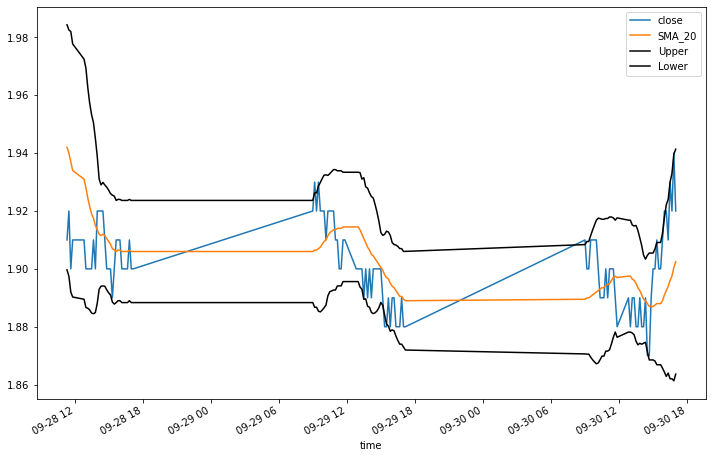

In [74]:
sbb = df.tail(120)[['close', 'SMA_20', 'Upper', 'Lower']].plot(style ={'Upper':'black', 'Lower':'black'})
sbb.figure.set_size_inches(12,8)

In [41]:
    fig = df.Figure(data=[go.Candlestick(x=df['date'], open=df['open'], high=df['high'], low=df['low'], close=df['close'])])
    fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            # dict(values=["2020-12-25", "2021-01-01"])  # hide holidays (Christmas and New Year's, etc)
        ]
    )
    fig.update_layout(
        title='Stock Analysis',
        yaxis_title=f'{symbol} Stock'
    )

    fig.show()

AttributeError: 'DataFrame' object has no attribute 'Figure'